<a href="https://colab.research.google.com/github/tleal92/MVP-PUCRIO-2024/blob/main/MVP_Analise_Exploratoria_PUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

Nome: Thales Leal

Matrícula: 4052024002145

Dataset:https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download

## Descrição do Problema

Neste projeto, será analisado um conjunto de dados relacionado à satisfação dos passageiros de companhias aéreas. O objetivo principal é realizar uma análise exploratória detalhada e aplicar técnicas de pré-processamento para entender o comportamento dos passageiros e os fatores que influenciam a satisfação.

## Hipóteses do Problema

- Passageiros da classe executiva tendem a estar mais satisfeitos.
- Atrasos ou mau atendimento estão associados à insatisfação.
- A satisfação está relacionada a múltiplos fatores como limpeza, entretenimento a bordo e check-in.

## Tipo de Problema

Este é um problema de **aprendizado supervisionado**, pois a variável-alvo ('satisfaction') já está rotulada.

## Seleção de Dados

O conjunto de dados foi extraído do site Kaggle e contém registros de passageiros com informações sobre suas experiências de voo. A base foi escolhida por apresentar dados categóricos e numéricos variados, ideais para aplicação de técnicas de análise e pré-processamento.

## Atributos do Dataset

| Atributo | Descrição |
|---------|-----------|
| Gender | Gênero do passageiro |
| Customer Type | Tipo de cliente |
| Age | Idade do passageiro |
| Type of Travel | Tipo de viagem |
| Class | Classe do assento |
| Flight Distance | Distância do voo |
| Inflight wifi service | Avaliação do Wi-Fi |
| Departure/Arrival time convenient | Conforto nos horários |
| Ease of Online booking | Facilidade de reserva |
| Gate location | Localização do portão |
| Food and drink | Avaliação do serviço de alimentação |
| Online boarding | Embarque online |
| Seat comfort | Conforto do assento |
| Inflight entertainment | Entretenimento a bordo |
| On-board service | Serviço a bordo |
| Leg room service | Espaço para pernas |
| Baggage handling | Bagagem |
| Checkin service | Check-in |
| Inflight service | Serviço geral no voo |
| Cleanliness | Limpeza |
| Departure Delay in Minutes | Atraso na partida |
| Arrival Delay in Minutes | Atraso na chegada |
| satisfaction | Satisfação do passageiro |

# Importação das Bibliotecas Necessárias e Carga de Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
%matplotlib inline

df = pd.read_csv('/content/airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Análise de Dados

## Total e Tipo das Instâncias

In [ ]:
print("Número de instâncias:", df.shape[0])
print("Número de atributos:", df.shape[1])
df.dtypes

Número de instâncias: 129880
Número de atributos: 24


,0
ID,int64
Gender,object
Age,int64
Customer Type,object
Type of Travel,object
Class,object
Flight Distance,int64
Departure Delay,int64
Arrival Delay,float64
Departure and Arrival Time Convenience,int64


## Estatísticas Descritivas

In [ ]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.00,0.0,13.00,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.00,3.0,4.00,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0


## Verificação de Valores Faltantes

In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


## Distribuição das Variáveis Numéricas

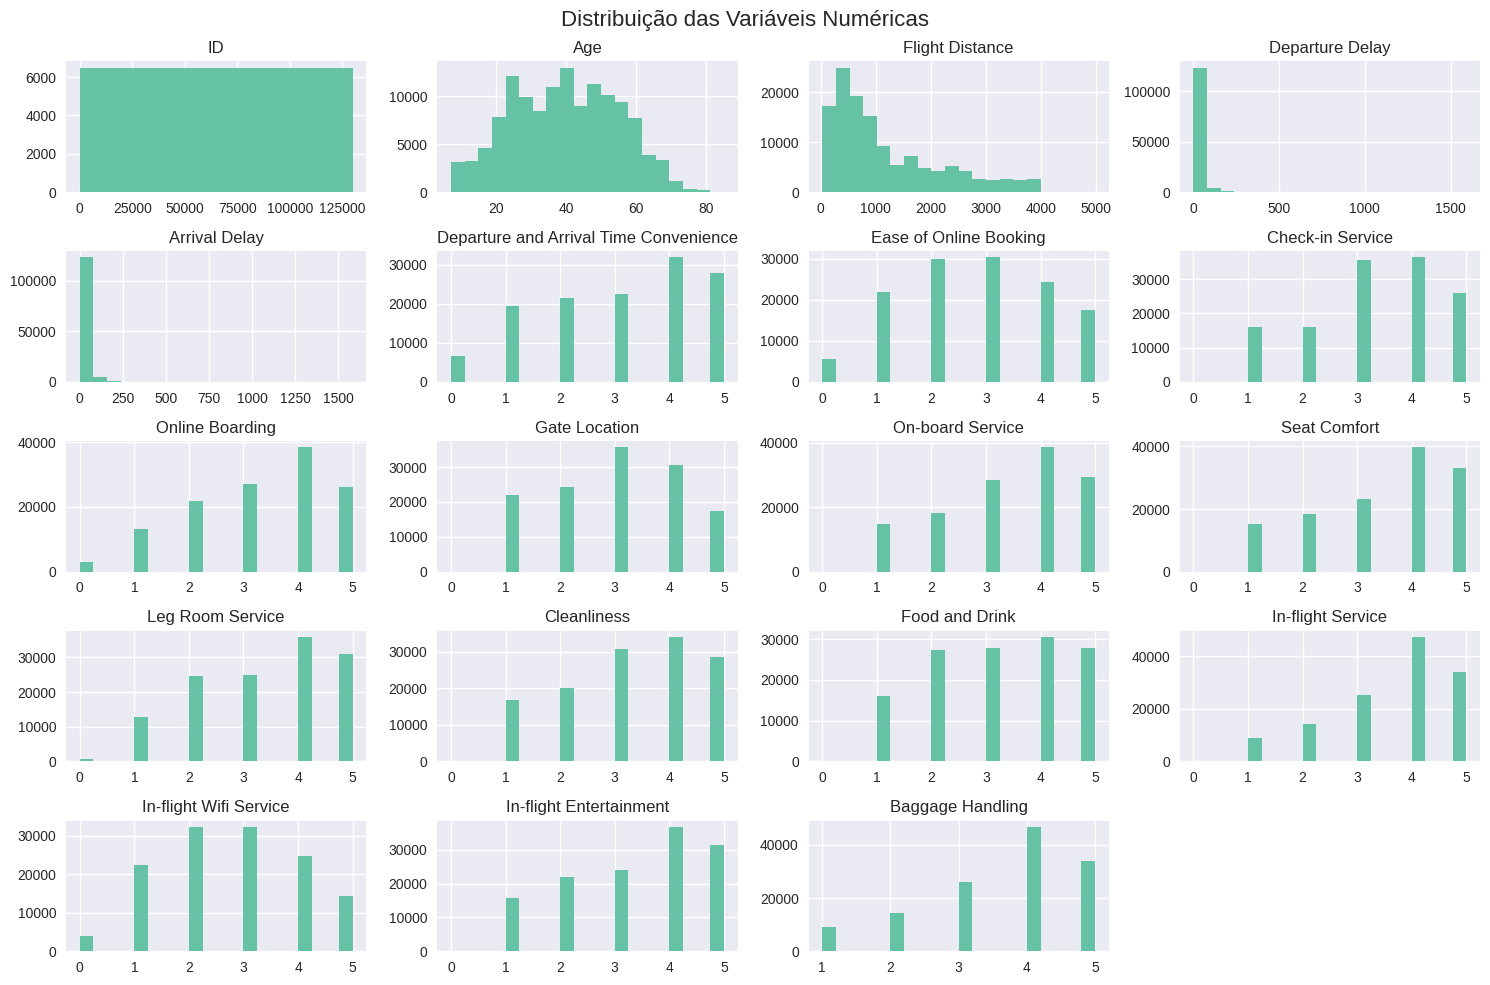

In [ ]:
df.select_dtypes(include=['int64', 'float64']).hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

## Distribuição da Variável Alvo (Satisfação)

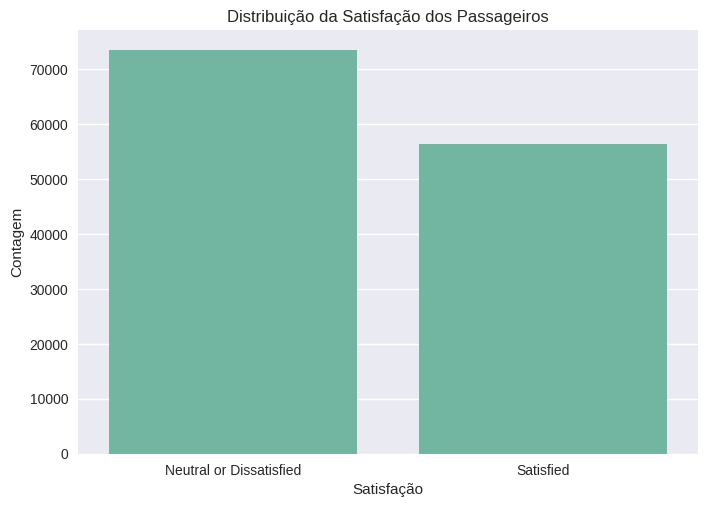

,proportion
Satisfaction,
Neutral or Dissatisfied,0.565537
Satisfied,0.434463


In [ ]:
sns.countplot(data=df, x='Satisfaction')
plt.title("Distribuição da Satisfação dos Passageiros")
plt.xlabel("Satisfação")
plt.ylabel("Contagem")
plt.show()

df['Satisfaction'].value_counts(normalize=True)

# Pré-processamento de Dados

## Tratamento de Valores Ausentes

In [ ]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].median())
df['Departure Delay'] = df['Departure Delay'].fillna(df['Departure Delay'].median())

## Codificação de Variáveis Categóricas

In [ ]:
df['Satisfaction'] = df['Satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
df_encoded = pd.get_dummies(df, drop_first=True)

## Normalização de Variáveis Numéricas

In [36]:
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('ID')

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

## Dataset Final Pré-processado

In [35]:
df_encoded.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,-1.732037,0.566960,-0.370261,-0.333948,-0.262342,-0.037727,0.173445,0.547894,-0.187037,0.018048,...,1.153946,0.204090,1.230787,1.159206,NaN,True,False,False,False,False
1,-1.732011,-0.292868,-0.370261,0.296454,0.621567,-0.692719,-0.539957,-0.241883,1.293662,-0.764109,...,1.153946,-0.548166,1.230787,1.159206,NaN,False,True,False,False,False
2,-1.731984,0.103976,-0.338179,-0.386481,-0.392329,0.617265,0.886847,0.547894,1.293662,0.800206,...,-0.545774,0.956346,-0.268414,-0.535681,NaN,True,True,False,False,False
3,-1.731957,0.699242,0.716512,-0.386481,-0.392329,-0.692719,-0.539957,-0.241883,0.553313,-0.764109,...,1.153946,-0.548166,1.230787,1.159206,NaN,True,True,False,False,False
4,-1.731931,0.633101,2.285515,-0.386481,-0.366332,-0.037727,0.173445,-0.241883,1.293662,0.018048,...,-0.545774,0.204090,-0.268414,-0.535681,NaN,False,True,False,False,False


## Comparação da Distribuição Antes e Depois da Normalização

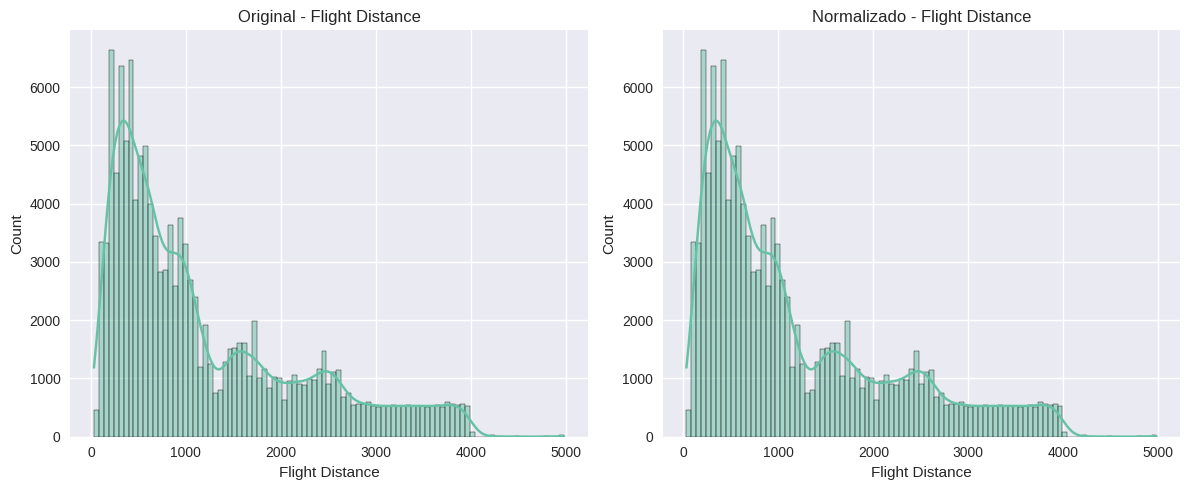

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Flight Distance'], kde=True, ax=axs[0])
axs[0].set_title('Original - Flight Distance')
sns.histplot(df_encoded['Flight Distance'], kde=True, ax=axs[1])
axs[1].set_title('Normalizado - Flight Distance')
plt.tight_layout()
plt.show()

Embora os histogramas da 'Flight Distance' original e normalizada pareçam semelhantes na forma, há uma diferença significativa em suas escalas. A normalização usando o `StandardScaler` transforma os dados de forma que eles tenham uma média de 0 e um desvio padrão de 1. Esse processo altera os valores no eixo x enquanto preserva a forma da distribuição subjacente.

No histograma original, o eixo x representa as distâncias reais de voo em suas unidades originais. No histograma normalizado, o eixo x representa os valores padronizados, indicando quantos desvios padrão cada ponto de dados está afastado da média. Essa transformação é crucial para muitos algoritmos de aprendizado de máquina que são sensíveis à escala das características de entrada.

## Conclusão

O dataset foi analisado e pré-processado com sucesso, incluindo a limpeza, codificação de variáveis categóricas e normalização das variáveis numéricas. O conjunto de dados está pronto para ser usado em algoritmos de aprendizado de máquina supervisionado.